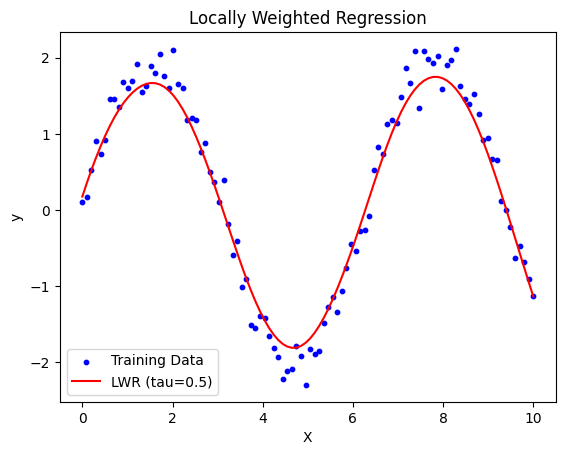

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def locally_weighted_regression(X, y, query_point, tau):
    X = np.c_[np.ones(X.shape[0]), X]
    query_point = np.r_[1, query_point]
    weights = np.exp(-np.sum((X - query_point) ** 2, axis=1) / (2 * tau ** 2))
    W = np.diag(weights)
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    return query_point @ theta
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * np.sin(X) + np.random.normal(0, 0.2, X.shape)
tau = 0.5
predictions = np.array([locally_weighted_regression(X, y, q, tau) for q in X])
plt.scatter(X, y, color="blue", s=10, label="Training Data")
plt.plot(X, predictions, color="red", label=f"LWR (tau={tau})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Locally Weighted Regression")
plt.show()